In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime


%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [31]:
fin_df = pd.read_csv('sp500_financial_year.csv', low_memory = False)
key_df = pd.read_csv('keyword.csv')

In [32]:
fin_df['gind'] = fin_df['gind'].astype('str')
fin_df['gind_4'] = fin_df['gind'].str[0:4]

In [33]:
industry_group_number = ["1010", "1510", "2010", "2020", "2030", "2510", "2520",
                       "2430", "2540", "2550", "3010", "3020", "3030", "3510",
                       "3520", "4010", "4020", "4030", "4510", "4520", "4530",
                       "5010", "5510", "6010"]

industry_group_name = ["Energy", "Materials", "Capital Goods",
                     "Coomercial & Professional Services", "Transportation",
                     "Automobiles & Components", "Consumer Durables & Apparel",
                     "Consumer Services", "Media", "Retailing", "Food & Staples Retailing",
                     "Food, Beverage & Tobacco", "Household & Personal Products",
                     "Health Care Equipment & Services",
                     "Pharmaceuticals, Biotechnology & Life Sciences",
                     "Banks", "Diversified Financials", "Insurance",
                     "Software & Services", "Technology Hardware & Equipment",
                     "Semiconductors & Semiconductor Equipment",
                     "Telecommunication Services", "Utilities", "Real Estate"]

industry_group_df = pd.DataFrame({'gind_4':industry_group_number,
                    'Category':industry_group_name})

In [34]:
fin1_df = pd.merge(fin_df, industry_group_df, on=['gind_4'], how='outer')

In [35]:
fin2_df = fin1_df[fin1_df.indfmt == 'INDL']

In [36]:
pd.options.mode.chained_assignment = None
fin2_df['t_equity'] = fin2_df['at'] - fin2_df['lt']
fin2_df['roe'] = fin2_df['ni'] / fin2_df['t_equity']
fin2_df['p_margin'] = fin2_df['ni'] / fin2_df['revt']
fin2_df['asset_to'] = fin2_df['revt'] / fin2_df['at']
fin2_df['leverage'] = fin2_df['at'] / fin2_df['t_equity']

In [44]:
fin2_df['conm'] = fin2_df['conm'].str.replace(' INC', '')
fin2_df['conm'] = fin2_df['conm'].str.replace(' CORP', '')
fin2_df['conm'] = fin2_df['conm'].str.replace(' & CO', '')
fin2_df['conm'] = fin2_df['conm'].str.replace(' CO', '')

In [260]:
fin_1990_df = fin2_df[fin2_df.fyear == 1990]
fin_2000_df = fin2_df[fin2_df.fyear == 2000]
fin_last_df = fin2_df[fin2_df.fyear == 2016]

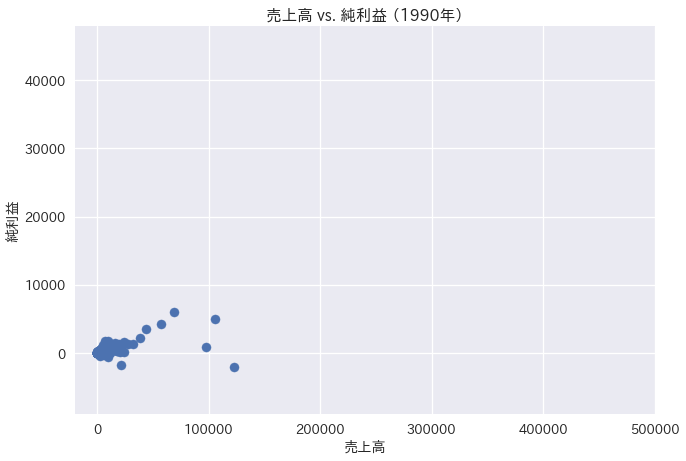

In [262]:
plt.scatter(fin_1990_df['revt'], fin_1990_df['ni'])
plt.ylim(-9000, 48000)
plt.xlim(-20000, 500000)
plt.title('売上高 vs. 純利益 （1990年）')
plt.xlabel('売上高')
plt.ylabel('純利益')

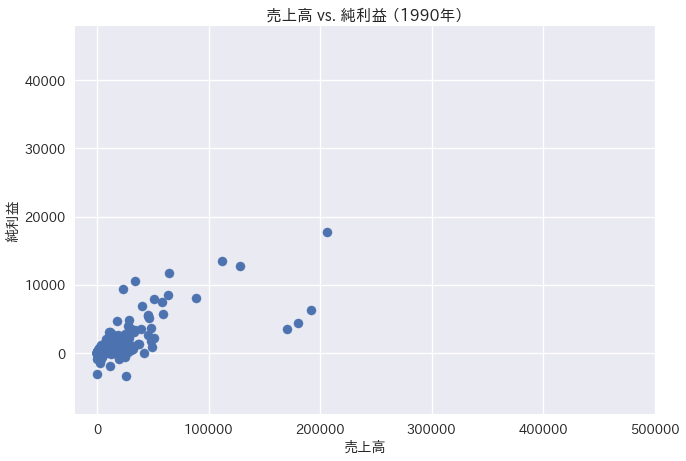

In [261]:
plt.scatter(fin_2000_df['revt'], fin_2000_df['ni'])
plt.ylim(-9000, 48000)
plt.xlim(-20000, 500000)
plt.title('売上高 vs. 純利益 （1990年）')
plt.xlabel('売上高')
plt.ylabel('純利益')

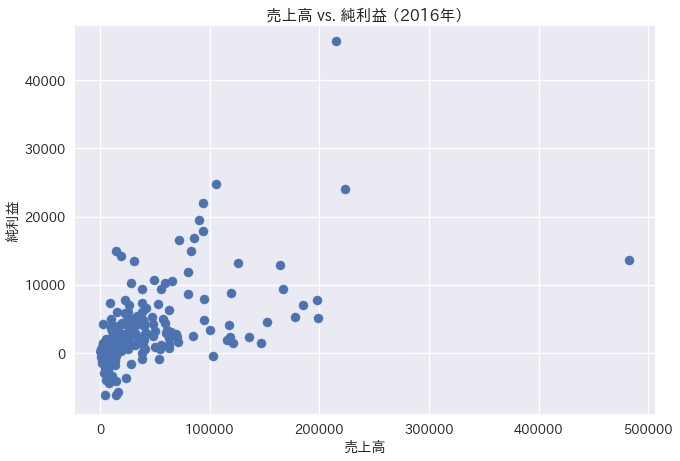

In [255]:
plt.scatter(fin_last_df['revt'], fin_last_df['ni'])
plt.ylim(-9000, 48000)
plt.title('売上高 vs. 純利益 （2016年）')
plt.xlabel('売上高')
plt.ylabel('純利益')

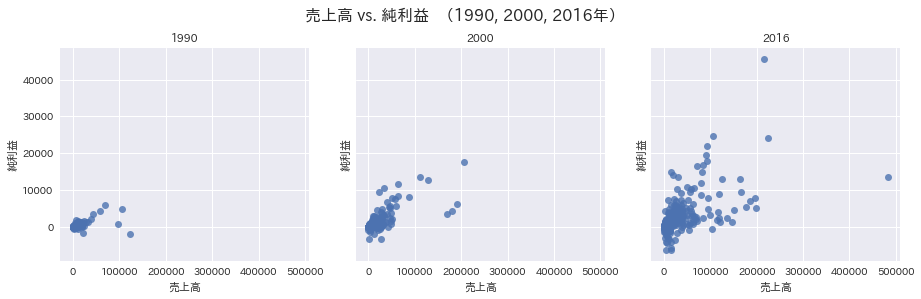

In [819]:
fin3_df = fin2_df[(fin2_df['fyear'] == 1990) | (fin2_df['fyear'] == 2000) | (fin2_df['fyear'] == 2016)]
fin3_df['fyear'] = fin3_df['fyear'].astype('int')

grid1 = sns.FacetGrid(fin3_df, col="fyear", col_wrap=3, size = 4.5)
grid1.map(sns.regplot, 'revt', 'ni', fit_reg=False).set_titles('{col_name}')
grid1.set(xlabel='売上高', ylabel='純利益')
sns.plt.suptitle('売上高 vs. 純利益　（1990, 2000, 2016年）', fontsize=16)

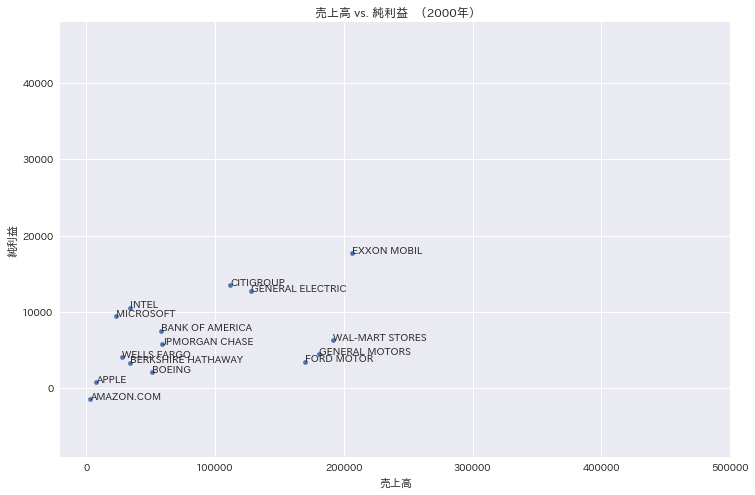

In [894]:
fin_2000_2_df = fin_2000_df.loc[:, ['revt', 'ni', 'conm']]
fin_2000_3_df = fin_2000_2_df[(fin_2000_2_df['conm'] == 'EXXON MOBIL') | 
                              (fin_2000_2_df['conm'] == 'WAL-MART STORES') |
                             (fin_2000_2_df['conm'] == 'APPLE') |
                             (fin_2000_2_df['conm'] == 'MICROSOFT') |
                             (fin_2000_2_df['conm'] == 'GENERAL MOTORS') |
                             (fin_2000_2_df['conm'] == 'FORD MOTOR') |
                             (fin_2000_2_df['conm'] == 'GENERAL ELECTRIC') |
                             (fin_2000_2_df['conm'] == 'BERKSHIRE HATHAWAY') |
                             (fin_2000_2_df['conm'] == 'JPMORGAN CHASE') |
                             (fin_2000_2_df['conm'] == 'INTEL') |
                             (fin_2000_2_df['conm'] == 'BOEING') |
                             (fin_2000_2_df['conm'] == 'BANK OF AMERICA') |
                             (fin_2000_2_df['conm'] == 'WELLS FARGO') |
                             (fin_2000_2_df['conm'] == 'CITIGROUP') |
                             (fin_2000_2_df['conm'] == 'AMAZON.COM') |
                             (fin_2000_2_df['conm'] == 'ALPHABET')]

plot3 = fin_2000_3_df.plot.scatter(x = 'revt', y = 'ni')
plt.title('売上高 vs. 純利益　（2000年）')
plt.xlabel('売上高')
plt.ylabel('純利益')
plt.ylim(-9000, 48000)
plt.xlim(-20000, 500000)
for k, v in fin_2000_3_df.iterrows():
    plot3.annotate(v[2], xy=(v[0],v[1]), size=10)

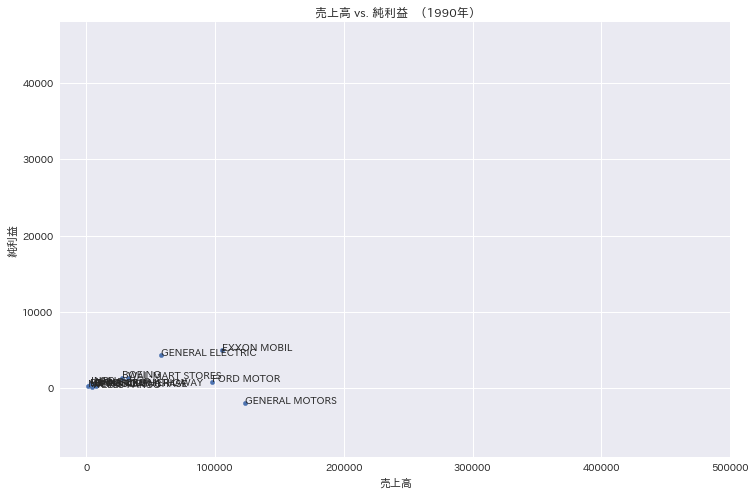

In [897]:
fin_1990_2_df = fin_1990_df.loc[:, ['revt', 'ni', 'conm']]
fin_1990_3_df = fin_1990_2_df[(fin_1990_2_df['conm'] == 'EXXON MOBIL') | 
                              (fin_1990_2_df['conm'] == 'WAL-MART STORES') |
                             (fin_1990_2_df['conm'] == 'APPLE') |
                             (fin_1990_2_df['conm'] == 'MICROSOFT') |
                             (fin_1990_2_df['conm'] == 'GENERAL MOTORS') |
                             (fin_1990_2_df['conm'] == 'FORD MOTOR') |
                             (fin_1990_2_df['conm'] == 'GENERAL ELECTRIC') |
                             (fin_1990_2_df['conm'] == 'BERKSHIRE HATHAWAY') |
                             (fin_1990_2_df['conm'] == 'JPMORGAN CHASE') |
                             (fin_1990_2_df['conm'] == 'INTEL') |
                             (fin_1990_2_df['conm'] == 'BOEING') |
                             (fin_1990_2_df['conm'] == 'BANK OF AMERICA') |
                             (fin_1990_2_df['conm'] == 'WELLS FARGO') |
                             (fin_1990_2_df['conm'] == 'CITIGROUP') |
                             (fin_1990_2_df['conm'] == 'AMAZON.COM') |
                             (fin_1990_2_df['conm'] == 'ALPHABET')]

plot5 = fin_1990_3_df.plot.scatter(x = 'revt', y = 'ni')
plt.title('売上高 vs. 純利益　（1990年）')
plt.xlabel('売上高')
plt.ylabel('純利益')
plt.ylim(-9000, 48000)
plt.xlim(-20000, 500000)
for k, v in fin_1990_3_df.iterrows():
    plot5.annotate(v[2], xy=(v[0],v[1]), size=10)

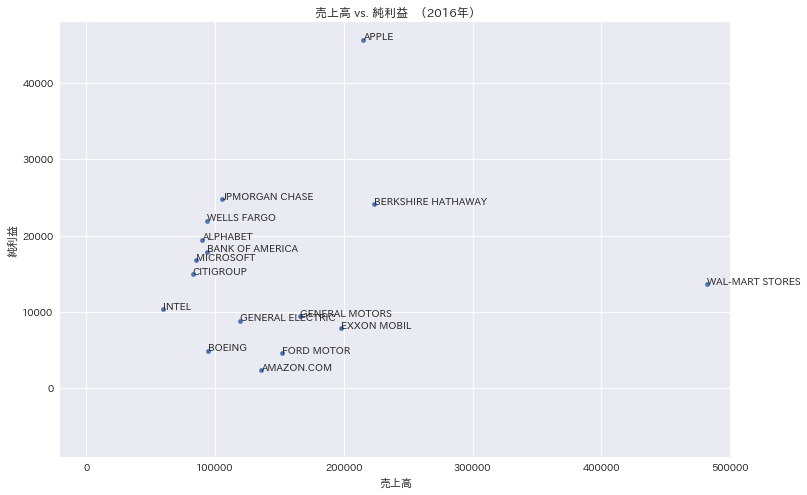

In [895]:
fin_last2_df = fin_last_df.loc[:, ['revt', 'ni', 'conm']]
fin_last3_df = fin_last2_df[(fin_last2_df['conm'] == 'EXXON MOBIL') | 
                              (fin_last2_df['conm'] == 'WAL-MART STORES') |
                             (fin_last2_df['conm'] == 'APPLE') |
                             (fin_last2_df['conm'] == 'MICROSOFT') |
                             (fin_last2_df['conm'] == 'GENERAL MOTORS') |
                             (fin_last2_df['conm'] == 'FORD MOTOR') |
                             (fin_last2_df['conm'] == 'GENERAL ELECTRIC') |
                             (fin_last2_df['conm'] == 'BERKSHIRE HATHAWAY') |
                             (fin_last2_df['conm'] == 'JPMORGAN CHASE') |
                             (fin_last2_df['conm'] == 'INTEL') |
                             (fin_last2_df['conm'] == 'BOEING') |
                             (fin_last2_df['conm'] == 'BANK OF AMERICA') |
                             (fin_last2_df['conm'] == 'WELLS FARGO') |
                             (fin_last2_df['conm'] == 'CITIGROUP') |
                             (fin_last2_df['conm'] == 'AMAZON.COM') |
                             (fin_last2_df['conm'] == 'ALPHABET')]

plot2 = fin_last3_df.plot.scatter(x = 'revt', y = 'ni')
plt.title('売上高 vs. 純利益　（2016年）')
plt.xlabel('売上高')
plt.ylabel('純利益')
plt.ylim(-9000, 48000)
plt.xlim(-20000, 500000)
for k, v in fin_last3_df.iterrows():
    plot2.annotate(v[2], xy=(v[0],v[1]), size=10)

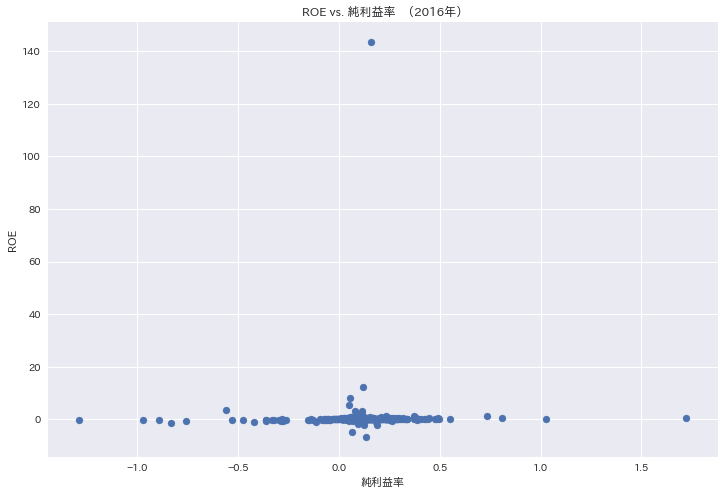

In [875]:
fin4_df = fin2_df.loc[:,['roe','ni','revt','conm','fyear','p_margin','asset_to','leverage']]
fin5_df = fin4_df[fin4_df['fyear'] == 2016]
plt.scatter(fin5_df['p_margin'], fin5_df['roe'])
plt.title('ROE vs. 純利益率　（2016年）')
plt.xlabel('純利益率')
plt.ylabel('ROE')

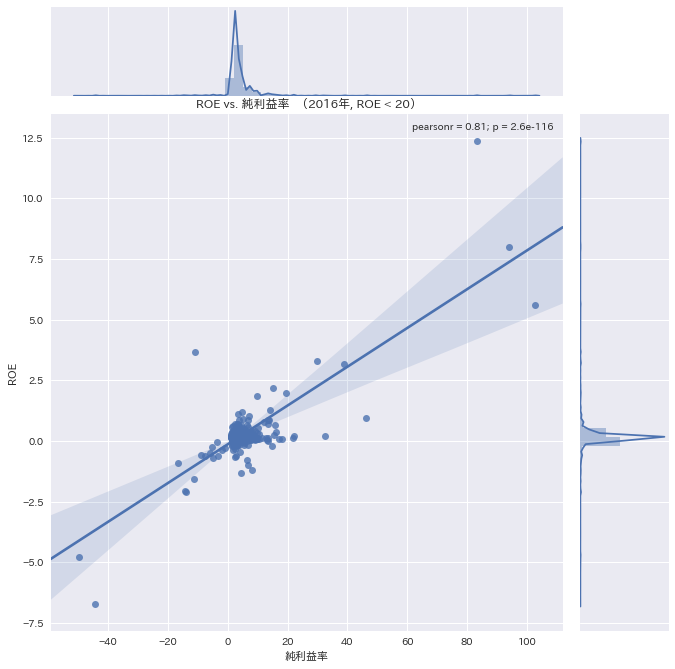

In [881]:
fin4_df = fin2_df.loc[:,['roe','ni','revt','conm','fyear','p_margin','asset_to','leverage']]
fin5_df = fin4_df[fin4_df['fyear'] == 2016]

#fin6_df = fin5_df[fin5_df['roe'] < 20]

sns.jointplot(fin6_df['leverage'], fin6_df['roe'], kind="reg", size = 10)
#plt.scatter(fin6_df['ni_per_revt'], fin6_df['roe'])
plt.title('ROE vs. 純利益率　（2016年, ROE < 20）')
plt.xlabel('純利益率')
plt.ylabel('ROE')

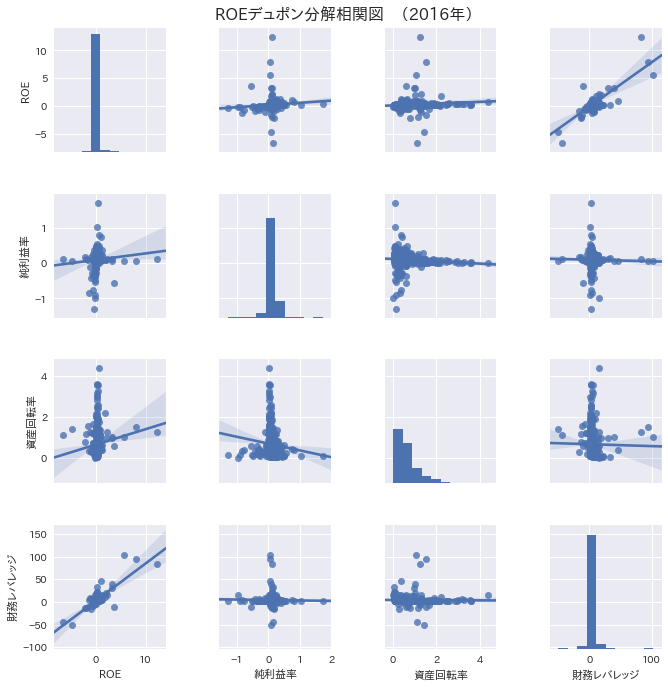

In [891]:
fin7_df = fin2_df.loc[:,['roe','fyear','p_margin','asset_to','leverage']]
fin8_df = fin7_df[fin7_df['fyear'] == 2016]
fin9_df = fin8_df.loc[:,['roe','p_margin','asset_to','leverage']]

fin10_df = fin9_df.dropna()

fin11_df = fin10_df[fin10_df['roe'] < 20]
fin12_df = fin11_df.rename(columns={'roe': 'ROE', 'p_margin':'純利益率','asset_to':'資産回転率','leverage':'財務レバレッジ'})

sns.pairplot(fin12_df, kind = 'reg')
sns.plt.suptitle('ROEデュポン分解相関図　（2016年）', fontsize=16)
plt.title('')
plt.xlabel('')
plt.ylabel('')

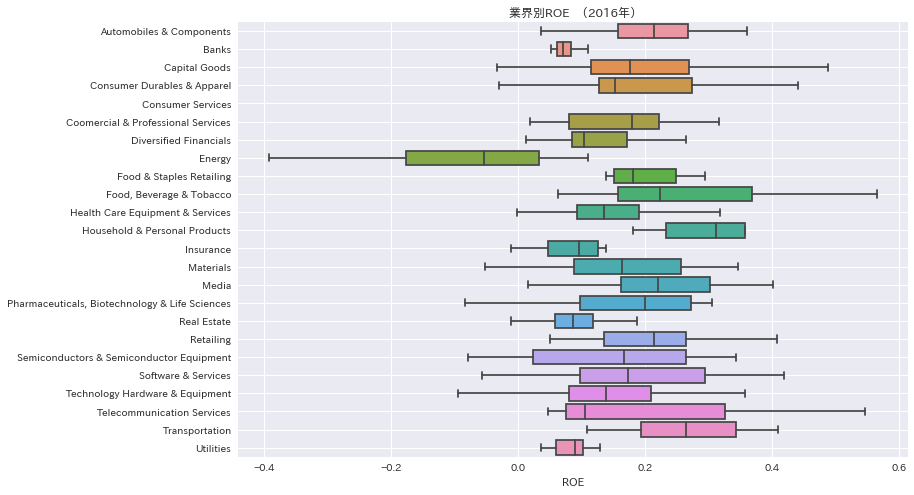

In [789]:
fin_last3_df = fin_last_df[fin_last_df['Category'] != 'NA']
fin_last4_df = fin_last_df[fin_last_df['roe'] < 10]

sns.boxplot(x = 'roe', y = 'Category', data = fin_last4_df, showfliers=False,
           order=["Automobiles & Components", "Banks", "Capital Goods","Consumer Durables & Apparel",
                  "Consumer Services", "Coomercial & Professional Services", "Diversified Financials", 
                  "Energy", "Food & Staples Retailing","Food, Beverage & Tobacco", 
                  "Health Care Equipment & Services","Household & Personal Products","Insurance",
                  "Materials", "Media","Pharmaceuticals, Biotechnology & Life Sciences",
                  "Real Estate","Retailing","Semiconductors & Semiconductor Equipment",
                  "Software & Services","Technology Hardware & Equipment","Telecommunication Services",
                  "Transportation","Utilities", ]).axes.yaxis.grid(True)
plt.title('業界別ROE　（2016年）')
plt.xlabel('ROE')
plt.ylabel('')

In [728]:
fin_last5_df = fin_last3_df.loc[:,['roe','p_margin', 'asset_to', 'leverage','Category']]
fin_last6_df = fin_last5_df.groupby('Category', as_index=False).mean()
fin_last7_df = pd.melt(fin_last6_df, id_vars=['Category'], value_vars=['p_margin','asset_to','leverage'])

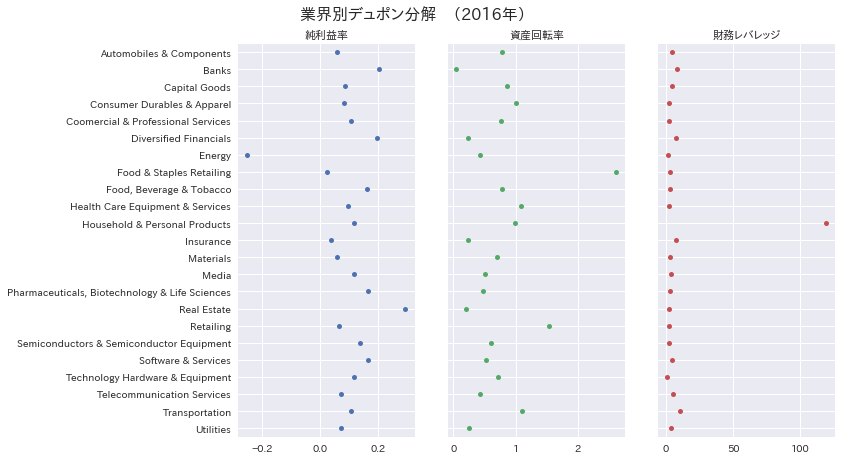

In [801]:
fin_last7_df['variable'] = fin_last7_df['variable'].str.replace('p_margin', '純利益率')
fin_last7_df['variable'] = fin_last7_df['variable'].str.replace('asset_to', '資産回転率')
fin_last7_df['variable'] = fin_last7_df['variable'].str.replace('leverage', '財務レバレッジ')

grid = sns.FacetGrid(fin_last7_df, col="variable", hue = 'variable', col_wrap=3, size=7, aspect=0.6, sharex=False)
grid.map(sns.stripplot, 'value', 'Category').set_titles("{col_name}")
grid.set(xlabel='', ylabel='')
sns.plt.suptitle('業界別デュポン分解　（2016年）', fontsize=16)
for a in grid.axes:
    a.yaxis.grid(True)

In [716]:
fin_last8_df = fin_last3_df.loc[:,['roe','p_margin', 'asset_to', 'leverage','Category','conm']]
fin_last9_df = fin_last8_df[fin_last8_df['Category'] == 'Energy']
fin_last10_df = pd.melt(fin_last9_df, id_vars=['conm'], value_vars=['p_margin','asset_to','leverage'])

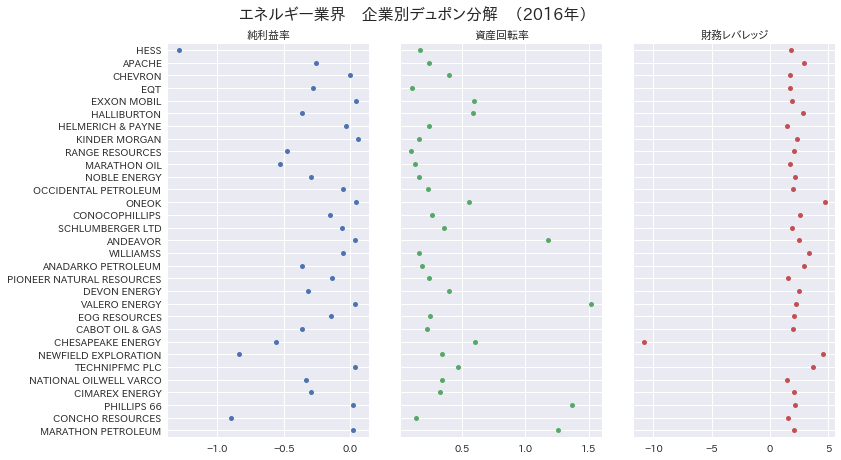

In [800]:
fin_last10_df['variable'] = fin_last10_df['variable'].str.replace('p_margin', '純利益率')
fin_last10_df['variable'] = fin_last10_df['variable'].str.replace('asset_to', '資産回転率')
fin_last10_df['variable'] = fin_last10_df['variable'].str.replace('leverage', '財務レバレッジ')

grid = sns.FacetGrid(fin_last10_df, col="variable", hue = 'variable', col_wrap=3, size=7, aspect=0.6, sharex=False)
grid.map(sns.stripplot, 'value', 'conm').set_titles("{col_name}")
grid.set(xlabel='', ylabel='')
sns.plt.suptitle('エネルギー業界　企業別デュポン分解　（2016年）', fontsize=16)
for a in grid.axes:
    a.yaxis.grid(True)

In [352]:
fin_energy_df = fin2_df[fin2_df.Category == 'Energy']
fin_energy_pm_df = fin_energy_df.loc[:,['p_margin','fyear','conm']]

In [358]:
fin_energy_pm_df = fin_energy_pm_df.dropna(axis=0, how='any')
fin_energy_pm_df['fyear'] = fin_energy_pm_df['fyear'].astype('int')

,p_margin,fyear,conm
4206,0.069480,1990,HESS
4207,0.013453,1991,HESS
4208,0.001284,1992,HESS
4209,-0.045834,1993,HESS
4210,0.011165,1994,HESS
4211,-0.054012,1995,HESS
4212,0.079797,1996,HESS
4213,0.000911,1997,HESS
4214,-0.069635,1998,HESS
4215,0.062169,1999,HESS


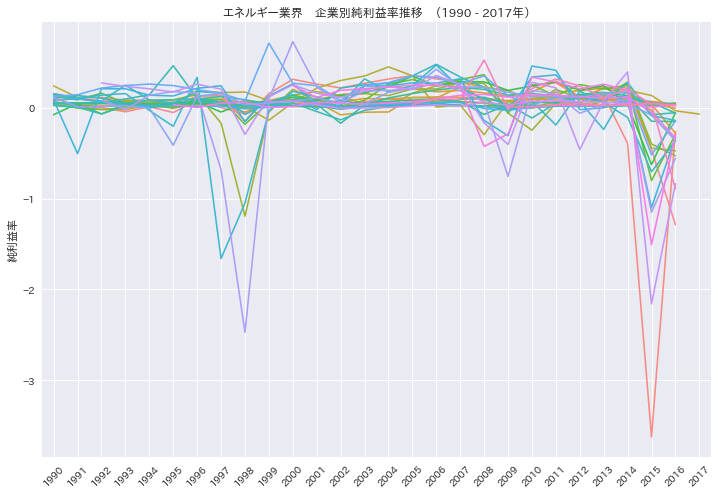

In [802]:
plot = sns.pointplot('fyear', 'p_margin', hue = 'conm', markers='None',scale = 0.5,size=7, aspect=2.5,data = fin_energy_pm_df)
plt.legend('')
plt.title('エネルギー業界　企業別純利益率推移　（1990 - 2017年）')
plt.xlabel('')
plt.ylabel('純利益率')
plt.xticks(rotation=45)
plot.grid(axis='x')

In [731]:
fin_last11_df = fin_last8_df[fin_last8_df['Category'] == 'Household & Personal Products']
fin_last12_df = pd.melt(fin_last11_df, id_vars=['conm'], value_vars=['roe','p_margin','asset_to','leverage'])

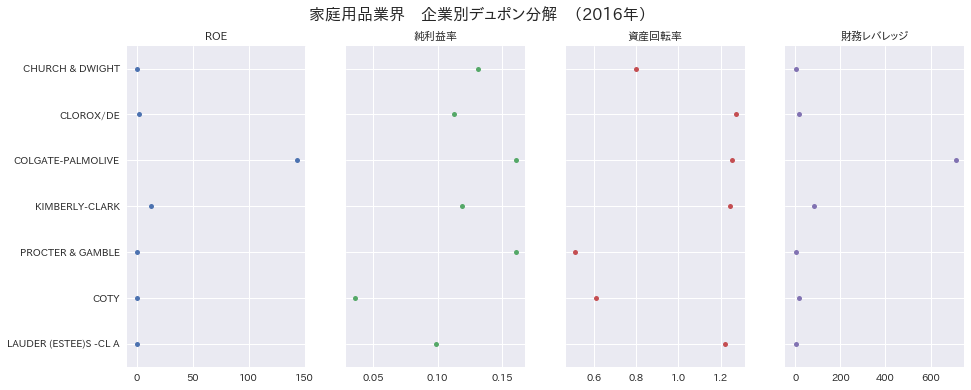

In [803]:
fin_last12_df['variable'] = fin_last12_df['variable'].str.replace('roe', 'ROE')
fin_last12_df['variable'] = fin_last12_df['variable'].str.replace('p_margin', '純利益率')
fin_last12_df['variable'] = fin_last12_df['variable'].str.replace('asset_to', '資産回転率')
fin_last12_df['variable'] = fin_last12_df['variable'].str.replace('leverage', '財務レバレッジ')

grid = sns.FacetGrid(fin_last12_df, col="variable", hue = 'variable', col_wrap=4, size=6, aspect=0.6, sharex=False)
grid.map(sns.stripplot, 'value', 'conm').set_titles("{col_name}")
grid.set(xlabel='', ylabel='')
sns.plt.suptitle('家庭用品業界　企業別デュポン分解　（2016年）', fontsize=16)
for a in grid.axes:
    a.yaxis.grid(True)

In [404]:
fin_last13_df = fin2_df[fin2_df['conm'] == 'COLGATE-PALMOLIVE']
fin_last14_df = fin_last13_df[fin_last13_df['fyear'] > 1999]
fin_last15_df = fin_last14_df.loc[:,['fyear','at','lt','t_equity','tstk','revt','ni','re','dvt']]

(array([ 1998.,  2000.,  2002.,  2004.,  2006.,  2008.,  2010.,  2012.,
         2014.,  2016.,  2018.]), <a list of 11 Text xticklabel objects>)

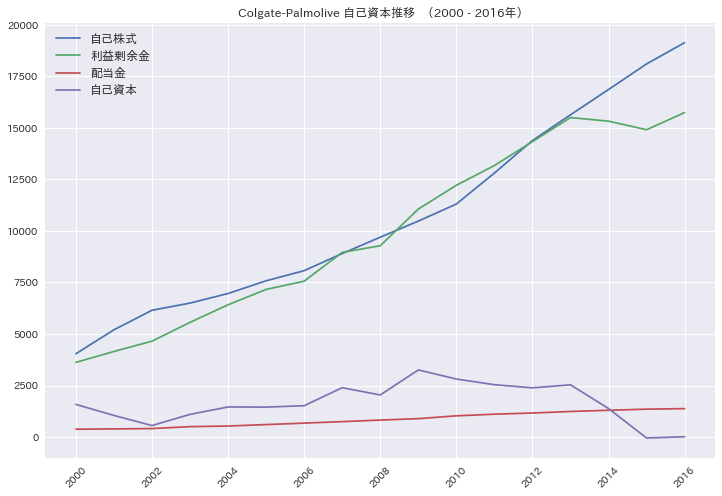

In [899]:
plt.plot('fyear', 'tstk',data = fin_last15_df)
plt.plot('fyear', 're',data = fin_last15_df)
plt.plot('fyear', 'dvt',data = fin_last15_df)
plt.plot('fyear', 't_equity',data = fin_last15_df)
plt.legend(['自己株式','利益剰余金','配当金','自己資本'], prop={'size': 12})
plt.title('Colgate-Palmolive 自己資本推移　（2000 - 2016年）')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

In [424]:
fin_last16_df = fin_last_df.loc[:,['conm','xrd','revt']]
fin_last17_df = fin_last16_df.sort_values(by=['xrd'],ascending=False)
fin_last17_df['rd_per_rev'] = fin_last17_df['xrd'] / fin_last17_df['revt']
fin_last18_df = fin_last17_df.head(20)

In [866]:
fin_2000_4_df = fin2_df[fin2_df.fyear == 2010]
fin_2000_4_df = fin_2000_4_df.loc[:,['conm','xrd','revt']]
fin_2000_5_df = fin_2000_4_df.sort_values(by=['xrd'],ascending=False)
fin_2000_5_df['rd_per_rev'] = fin_2000_5_df['xrd'] / fin_2000_5_df['revt']
fin_2000_6_df = fin_2000_5_df.head(20)

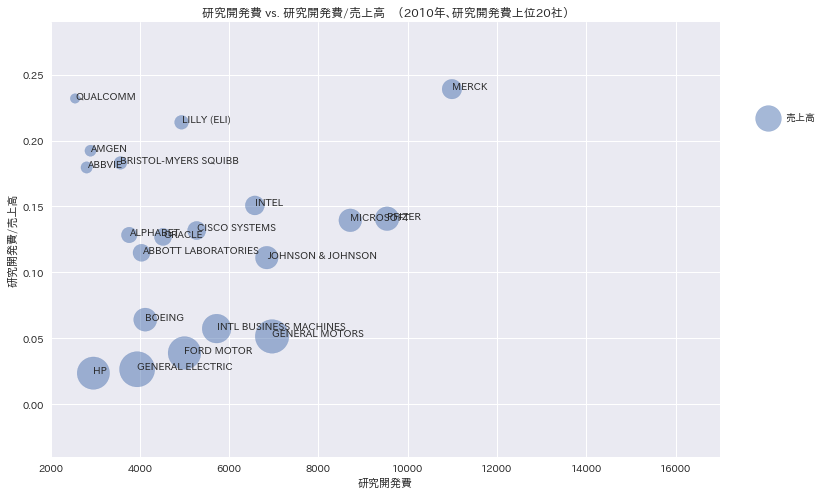

In [867]:
plot = fin_2000_6_df.plot.scatter(x = 'xrd', y = 'rd_per_rev', s=fin_2000_6_df['revt']/120, alpha = 0.5, label = '売上高')
plt.title('研究開発費 vs. 研究開発費/売上高　（2010年、研究開発費上位20社）')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('研究開発費')
plt.ylabel('研究開発費/売上高')
plt.xlim(2000,17000)
plt.ylim(-0.04,0.29)
for k, v in fin_2000_6_df.iterrows():
    plot.annotate(v[0], xy=(v[1],v[3]), size=10)

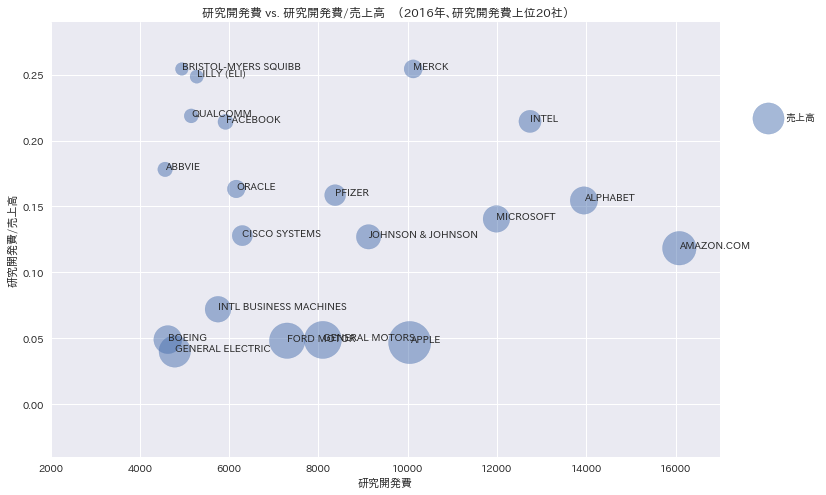

In [855]:
plot = fin_last18_df.plot.scatter(x = 'xrd', y = 'rd_per_rev', s=fin_last18_df['revt']/120, alpha = 0.5, label = '売上高')
plt.title('研究開発費 vs. 研究開発費/売上高　（2016年、研究開発費上位20社）')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc=2, borderaxespad=0.)
plt.xlabel('研究開発費')
plt.ylabel('研究開発費/売上高')
plt.xlim(2000,17000)
plt.ylim(-0.04,0.29)
for k, v in fin_last18_df.iterrows():
    plot.annotate(v[0], xy=(v[1],v[3]), size=10)

In [474]:
fin_last19_df = fin2_df.loc[:,['fyear','revt','conm']]
fin_last20_df = fin_last19_df[(fin_last19_df['conm'] == 'APPLE')]
fin_last21_df = fin_last19_df[(fin_last19_df['conm'] == 'AMAZON.COM')]
fin_last22_df = fin_last19_df[(fin_last19_df['conm'] == 'ALPHABET')]
fin_last23_df = fin_last19_df[(fin_last19_df['conm'] == 'MICROSOFT')]
fin_last24_df = fin_last19_df[(fin_last19_df['conm'] == 'FACEBOOK')]

(array([ 1985.,  1990.,  1995.,  2000.,  2005.,  2010.,  2015.,  2020.]),
 <a list of 8 Text xticklabel objects>)

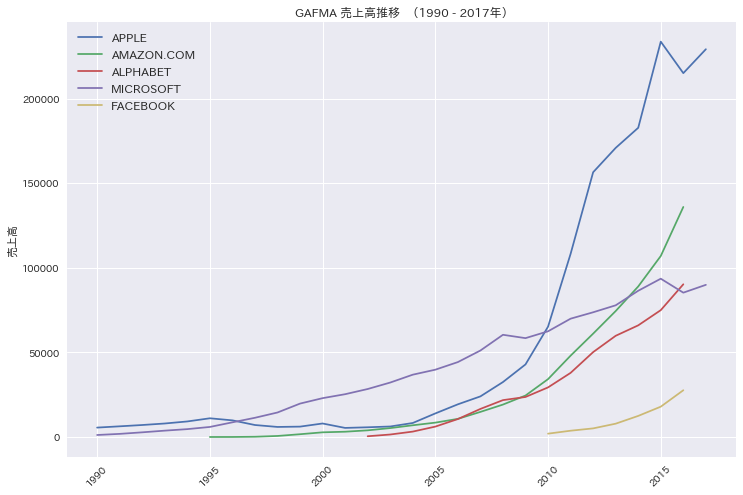

In [806]:
plt.plot('fyear', 'revt',data = fin_last20_df)
plt.plot('fyear', 'revt',data = fin_last21_df)
plt.plot('fyear', 'revt',data = fin_last22_df)
plt.plot('fyear', 'revt',data = fin_last23_df)
plt.plot('fyear', 'revt',data = fin_last24_df)
plt.legend(['APPLE','AMAZON.COM','ALPHABET','MICROSOFT','FACEBOOK'], prop={'size': 12})
plt.title('GAFMA 売上高推移　（1990 - 2017年）')
plt.xlabel('')
plt.ylabel('売上高')
plt.xticks(rotation=45)

In [724]:
fin_last28_df = fin2_df.loc[:,['fyear','conm','oancf','ivncf','fincf']]
fin_last28_df['freecf'] = fin_last28_df['oancf'] + fin_last28_df['ivncf']

fin_last29_df = fin_last28_df[fin_last28_df['fyear'] > 1999]
fin_last30_df = fin_last29_df[(fin_last29_df['conm'] == 'APPLE')]
fin_last31_df = fin_last29_df[(fin_last29_df['conm'] == 'AMAZON.COM')]
fin_last32_df = fin_last29_df[(fin_last29_df['conm'] == 'ALPHABET')]
fin_last33_df = fin_last29_df[(fin_last29_df['conm'] == 'MICROSOFT')]
fin_last34_df = fin_last29_df[(fin_last29_df['conm'] == 'FACEBOOK')]

fin_last35_df = pd.melt(fin_last30_df, id_vars=['conm','fyear'], value_vars=['oancf','ivncf','fincf','freecf'])
fin_last36_df = pd.melt(fin_last31_df, id_vars=['conm','fyear'], value_vars=['oancf','ivncf','fincf','freecf'])
fin_last37_df = pd.melt(fin_last32_df, id_vars=['conm','fyear'], value_vars=['oancf','ivncf','fincf','freecf'])
fin_last38_df = pd.melt(fin_last33_df, id_vars=['conm','fyear'], value_vars=['oancf','ivncf','fincf','freecf'])
fin_last39_df = pd.melt(fin_last34_df, id_vars=['conm','fyear'], value_vars=['oancf','ivncf','fincf','freecf'])

fin_last35_df['fyear'] = fin_last35_df['fyear'].astype('int')

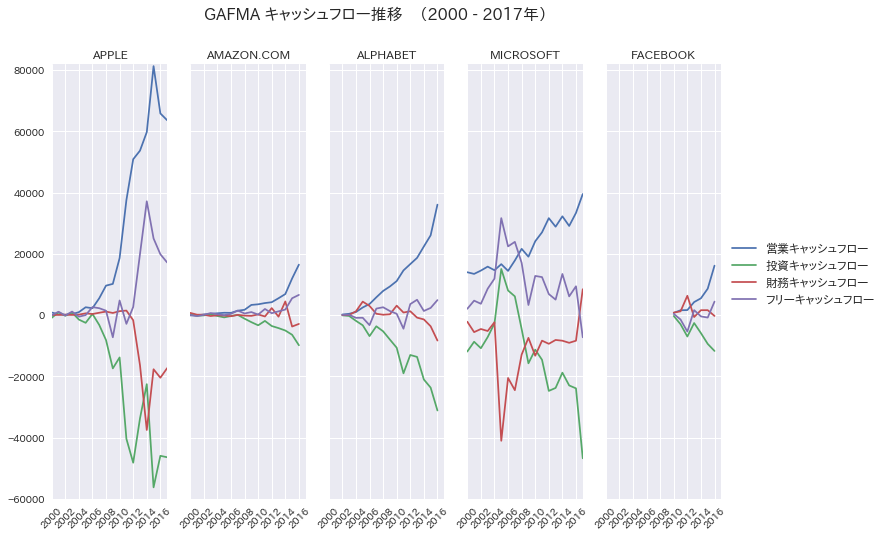

In [808]:
plt.subplot(151)
plt.plot('fyear', 'value',data = fin_last35_df[fin_last35_df.variable == 'oancf'])
plt.plot('fyear', 'value',data = fin_last35_df[fin_last35_df.variable == 'ivncf'])
plt.plot('fyear', 'value',data = fin_last35_df[fin_last35_df.variable == 'fincf'])
plt.plot('fyear', 'value',data = fin_last35_df[fin_last35_df.variable == 'freecf'])

plt.title('APPLE')
plt.xlabel('')
plt.ylabel('')
plt.xlim(2000, 2017)
plt.ylim(-60000,82000)
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))

plt.subplot(152)
plt.plot('fyear', 'value',data = fin_last36_df[fin_last36_df.variable == 'oancf'])
plt.plot('fyear', 'value',data = fin_last36_df[fin_last36_df.variable == 'ivncf'])
plt.plot('fyear', 'value',data = fin_last36_df[fin_last36_df.variable == 'fincf'])
plt.plot('fyear', 'value',data = fin_last36_df[fin_last36_df.variable == 'freecf'])

plt.title('AMAZON.COM')
plt.xlabel('')
plt.ylabel('')
plt.xlim(2000, 2017)
plt.ylim(-60000,82000)
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.tick_params(labelleft='off')

plt.subplot(153)
plt.plot('fyear', 'value',data = fin_last37_df[fin_last37_df.variable == 'oancf'])
plt.plot('fyear', 'value',data = fin_last37_df[fin_last37_df.variable == 'ivncf'])
plt.plot('fyear', 'value',data = fin_last37_df[fin_last37_df.variable == 'fincf'])
plt.plot('fyear', 'value',data = fin_last37_df[fin_last37_df.variable == 'freecf'])

plt.title('ALPHABET')
plt.xlabel('')
plt.ylabel('')
plt.xlim(2000, 2017)
plt.ylim(-60000,82000)
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.tick_params(labelleft='off')

plt.subplot(154)
plt.plot('fyear', 'value',data = fin_last38_df[fin_last38_df.variable == 'oancf'])
plt.plot('fyear', 'value',data = fin_last38_df[fin_last38_df.variable == 'ivncf'])
plt.plot('fyear', 'value',data = fin_last38_df[fin_last38_df.variable == 'fincf'])
plt.plot('fyear', 'value',data = fin_last38_df[fin_last38_df.variable == 'freecf'])

plt.title('MICROSOFT')
plt.xlabel('')
plt.ylabel('')
plt.xlim(2000, 2017)
plt.ylim(-60000,82000)
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.tick_params(labelleft='off')

plt.subplot(155)
plt.plot('fyear', 'value',data = fin_last39_df[fin_last39_df.variable == 'oancf'])
plt.plot('fyear', 'value',data = fin_last39_df[fin_last39_df.variable == 'ivncf'])
plt.plot('fyear', 'value',data = fin_last39_df[fin_last39_df.variable == 'fincf'])
plt.plot('fyear', 'value',data = fin_last39_df[fin_last39_df.variable == 'freecf'])

plt.legend(['営業キャッシュフロー','投資キャッシュフロー','財務キャッシュフロー','フリーキャッシュフロー'], prop={'size': 12}, loc='best',
           bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
           borderaxespad=0.,)
plt.title('FACEBOOK')
plt.xlabel('')
plt.ylabel('')
plt.xlim(2000, 2017)
plt.ylim(-60000,82000)
plt.xticks(rotation=45)
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.tick_params(labelleft='off')

plt.suptitle('GAFMA キャッシュフロー推移　（2000 - 2017年）', fontsize=16)

In [717]:
fin_last40_df = fin_last8_df[(fin_last8_df['conm'] == 'APPLE')|
                            (fin_last8_df['conm'] == 'AMAZON.COM')|
                            (fin_last8_df['conm'] == 'ALPHABET')|
                            (fin_last8_df['conm'] == 'MICROSOFT')|
                            (fin_last8_df['conm'] == 'FACEBOOK')]
fin_last41_df = pd.melt(fin_last40_df, id_vars=['conm'], value_vars=['roe','p_margin','asset_to','leverage'])

In [785]:
fin_last44_df = fin2_df.loc[:,['fyear','conm','at','t_equity']]
fin_last44_df['t_equity_per_at'] = fin_last44_df['t_equity'] / fin_last44_df['at']

In [786]:
fin_last45_df = fin_last44_df[(fin_last44_df['conm'] == 'APPLE')]
fin_last46_df = fin_last44_df[(fin_last44_df['conm'] == 'AMAZON.COM')]
fin_last47_df = fin_last44_df[(fin_last44_df['conm'] == 'ALPHABET')]
fin_last48_df = fin_last44_df[(fin_last44_df['conm'] == 'MICROSOFT')]
fin_last49_df = fin_last44_df[(fin_last44_df['conm'] == 'FACEBOOK')]

(array([ 1985.,  1990.,  1995.,  2000.,  2005.,  2010.,  2015.,  2020.]),
 <a list of 8 Text xticklabel objects>)

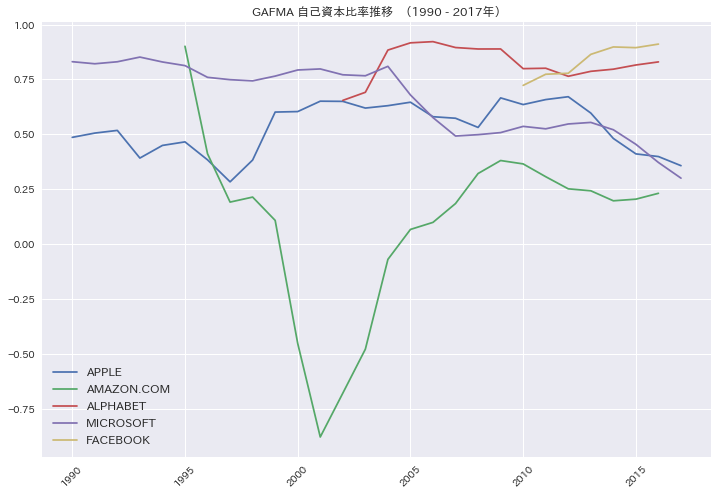

In [809]:
plt.plot('fyear', 't_equity_per_at',data = fin_last45_df)
plt.plot('fyear', 't_equity_per_at',data = fin_last46_df)
plt.plot('fyear', 't_equity_per_at',data = fin_last47_df)
plt.plot('fyear', 't_equity_per_at',data = fin_last48_df)
plt.plot('fyear', 't_equity_per_at',data = fin_last49_df)
plt.legend(['APPLE','AMAZON.COM','ALPHABET','MICROSOFT','FACEBOOK'], prop={'size': 12})
plt.title('GAFMA 自己資本比率推移　（1990 - 2017年）')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

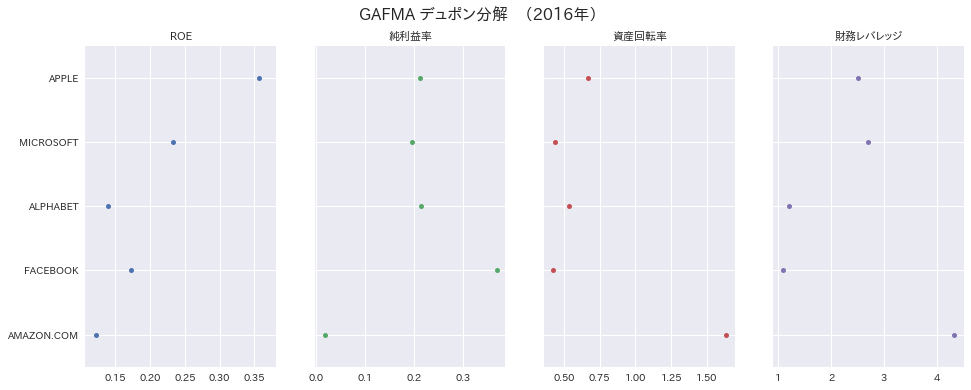

In [810]:
fin_last41_df['variable'] = fin_last41_df['variable'].str.replace('roe', 'ROE')
fin_last41_df['variable'] = fin_last41_df['variable'].str.replace('p_margin', '純利益率')
fin_last41_df['variable'] = fin_last41_df['variable'].str.replace('asset_to', '資産回転率')
fin_last41_df['variable'] = fin_last41_df['variable'].str.replace('leverage', '財務レバレッジ')

grid = sns.FacetGrid(fin_last41_df, col="variable", hue = 'variable', col_wrap=4, size=6, aspect=0.6, sharex=False)
grid.map(sns.stripplot, 'value', 'conm').set_titles("{col_name}")
grid.set(xlabel='', ylabel='')
sns.plt.suptitle('GAFMA デュポン分解　（2016年）', fontsize=16)
for a in grid.axes:
    a.yaxis.grid(True)

In [812]:
fin_last42_df = fin2_df.loc[:,['txndb','conm','fyear','revt','txt','ebit']]
fin_last43_df = fin_last42_df[fin_last42_df['fyear']==2016]
fin_last43_df['txt_per_ebit'] = fin_last43_df['txt'] / fin_last43_df['ebit']

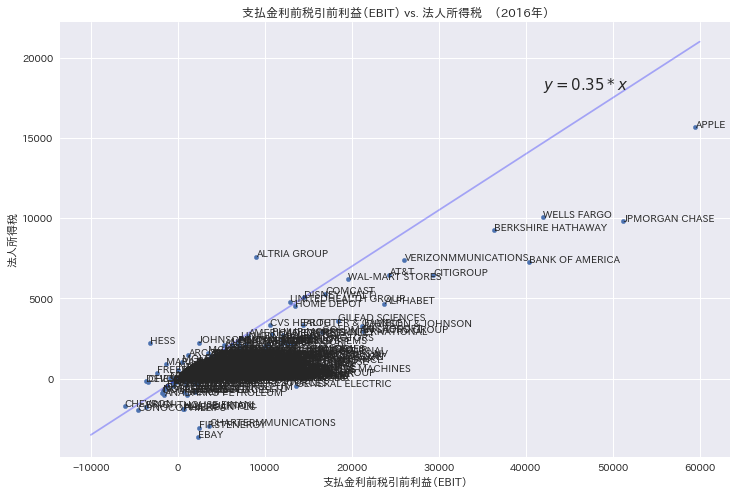

In [823]:
plot = fin_last43_df.plot.scatter(x='ebit', y='txt')
plt.title('支払金利前税引前利益（EBIT） vs. 法人所得税　（2016年）')
plt.xlabel('支払金利前税引前利益（EBIT）')
plt.ylabel('法人所得税')

x = np.linspace(-10000,60000)
y = 0.35 * x
plt.plot(x,y,"r-", color = 'blue', alpha = 0.3) 
plt.text(42000, 18000, r'$y=0.35*x$', fontsize=15)

for k, v in fin_last43_df.iterrows():
    plot.annotate(v[1], xy=(v[5],v[4]), size=10)

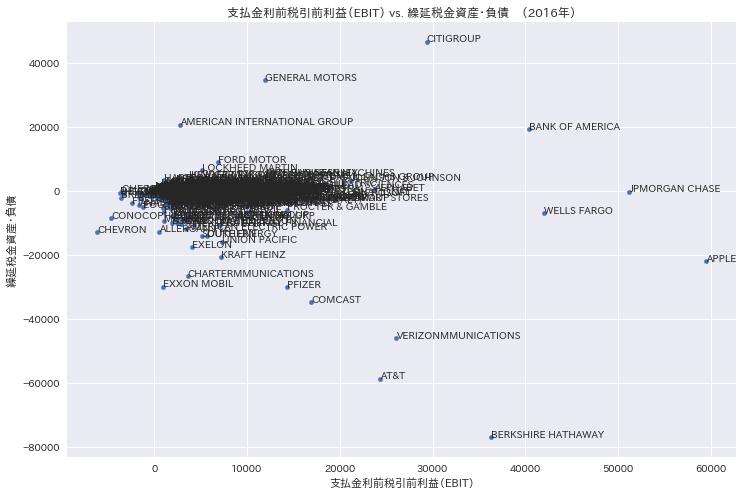

In [900]:
plot = fin_last43_df.plot.scatter(x='ebit', y='txndb')
plt.title('支払金利前税引前利益（EBIT） vs. 繰延税金資産・負債　（2016年）')
plt.xlabel('支払金利前税引前利益（EBIT）')
plt.ylabel('繰延税金資産・負債')

for k, v in fin_last43_df.iterrows():
    plot.annotate(v[1], xy=(v[5],v[0]), size=10)